# [NAPARI](https://napari.org/) testing
## and adding [cellpose](https://cellpose-napari.readthedocs.io/en/latest/index.html) (installer [here](https://pypi.org/project/cellpose-napari/0.1.3/))

To upgrade run in a cell:
```python
!pip install cellpose-napari==0.1.3
!pip install cellpose --upgrade
```

```bash
napari -w cellpose-napari
```

In [ ]:
## to install
# !pip install napari[all]
# !pip install QT
# !pip install napari[pyqt5]
# !pip install cellpose-napari==0.1.3
# !pip install napari-nikon-nd2
# !pip install magicgui
# !pip install napari-pyclesperanto-assistant

## to upgrade:
# !pip install cellpose-napari==0.1.3
# !pip install cellpose --upgrade
# !pip install napari[all] --upgrade

### Basic usage:
```python
viewer = napari.view_image(data.astronaut(), rgb=True)
nbscreenshot(viewer)
viewer.close()
```

example notebooks [here](https://github.com/sofroniewn/napari-training-course/blob/master/lessons/)

In [1]:
import napari
from magicgui import magicgui
from enum import Enum
import cellpose_napari
import cellpose
from cellpose import models
from napari.utils import nbscreenshot
from tifffile import imread
import numpy as np
from scipy import ndimage
from scipy.stats import mannwhitneyu, kruskal
import scikit_posthocs
import napari_nikon_nd2
import os 
from magicgui import magicgui
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *
import ipywidgets
from tqdm import tqdm
import time
import sys
from plotParams import *
from juanNapariFx import *


pBGMenu = ipywidgets.Dropdown(options=['Light', 'Dark'],value='Light',disabled=False, layout=ipywidgets.Layout(width='20%', height='40px'))
pBGLabel = ipywidgets.widgets.Label('Select plotting style', layout=ipywidgets.Layout(width='20%', height='30px'))
pBG = ipywidgets.widgets.VBox([pBGLabel,pBGMenu])
pBG

In [2]:
applyPlotStyle(pBGMenu.value)
viewer = napari.Viewer()

Plotting style is Light
Assistant skips harvesting pyclesperanto as it's not installed.


/Users/angueyraaristjm/opt/anaconda3/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [ ]:
# viewer.close()

***
# Index <a id='Index'>∮</a>
***
- [Extraction of z planes for analysis](#zExtract)
- [Segmentation with cellpose](#cellSeg)
- [Manual correction of segmentation](#manualCuration)
- [Create thumbnails _WIP_](#thumbnails)
- [Quantification](#quantification)

In [ ]:
# get file names
dPath = "/Volumes/angueyra04/LiImaging/20221026_tbx2F0s_m2Gs2C/"
gene = 'wt'
fList = !ls $dPath/*$gene*[002,004].nd2
# fList = !ls $dPath/*$gene*['b','d'].nd2
fList = list(map(lambda st: str.replace(st, dPath + '/', 'fPath = \"'), fList))
fList = list(map(lambda st: str.replace(st, '.nd2', '\"; gene = \'' + gene + '\'; '), fList))
print(*fList, sep = "\n")

***
## Extract layers from z-stacks<a id='zExtract'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

# open file
dPath = "/Volumes/angueyra04/LiImaging/20221026_tbx2F0s_m2Gs2C/"

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002"; gene = 'wt'; zlims = [24,26]; zlims2 = [17,20]; # nice one
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004"; gene = 'wt'; zlims = [34,36]; zlims2 = [27,30]; # ok
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002"; gene = 'wt'; zlims = [19,21]; zlims2 = [17,19]; # good DAPI
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004"; gene = 'wt'; zlims = [15,17]; zlims2 = [11,13]; # nice
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002"; gene = 'wt'; zlims = [23,25]; zlims2 = [14,16]; # ok
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004"; gene = 'wt'; zlims = [26,28]; zlims2 = [18,21]; # ok
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002"; gene = 'wt'; zlims = [17,19]; zlims2 = [13,15];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002"; gene = 'wt'; zlims = [14,16]; zlims2 = [9,11];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002"; gene = 'wt'; zlims = [20,22]; zlims2 = [12,14]; # small but obvious rip in FOV

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002"; gene = 'tbx2b'; zlims = [24,26]; zlims2 = [15,17]; # clear lor and misexpressor; used zlims2 for N_mip
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004"; gene = 'tbx2b'; zlims = [22,24]; zlims2 = [15,17]; # clear lor and misexpressor; quite nice
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002"; gene = 'tbx2b'; zlims = [28,30]; zlims2 = [20,22]; # mild nalou but clear misexpressor
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004"; gene = 'tbx2b'; zlims = [22,24]; zlims2 = [16,19]; # clear misexpressor
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002"; gene = 'tbx2b'; zlims = [19,21]; zlims2 = [15,17];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004"; gene = 'tbx2b'; zlims = [27,29]; zlims2 = [20,22];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002"; gene = 'tbx2b'; zlims = [23,25]; zlims2 = [19,21];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004"; gene = 'tbx2b'; zlims = [10,12]; zlims2 = [3,5];

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002"; gene = 'tbx2a'; zlims = [21,23]; zlims2 = [15,17]; # sclera+ but ok; mild pehnotype?
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002"; gene = 'tbx2a'; zlims = [34,36]; zlims2 = [20,22]; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004"; gene = 'tbx2a'; zlims = [27,29]; zlims2 = [17,19]; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002"; gene = 'tbx2a'; zlims = [19,21]; zlims2 = [13,15]; # half retina lost but zoom is very good.
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004"; gene = 'tbx2a'; zlims = [34,36]; zlims2 = [21,23]; # also half retina lost but zoom is good.
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_002"; gene = 'tbx2a'; zlims = [21,23]; zlims2 = [15,17]; # looks wt and quite dorsal; EXCLUDE
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_004"; gene = 'tbx2a'; zlims = [17,19]; zlims2 = [3,5]; # also looks very wt; EXCLUDE
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002"; gene = 'tbx2a'; zlims = [25,27]; zlims2 = [19,21]; #curvy but strong phenotype
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004"; gene = 'tbx2a'; zlims = [29,31]; zlims2 = [17,19]; # slightly dorsal but this could be nalou example
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002"; gene = 'tbx2a'; zlims = [32,34]; zlims2 = [21,23];
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004"; gene = 'tbx2a'; zlims = [19,21]; zlims2 = [5,7];


# uninjected
# dPath = "/Volumes/zfSSD/LiImaging/A1R/zf/20201113_CRtbx2b/"
# ### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b"; zlims = [39,43]; gene = 'wt'; # a little curved and nerve head is included
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d"; zlims=[29,32]; gene = "wt";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b"; zlims=[30,32]; gene = "wt";  #EXAMPLE???
# #### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b2"; zlims=[00,00]; gene = "wt";  # beautiful peripheral retina
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d"; zlims=[28,30]; gene = "wt";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b"; zlims=[36,39]; gene = "wt";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d"; zlims=[32,34]; gene = "wt";
# #### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10b"; zlims=[00,00]; gene = "wt"; #side-view
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d"; zlims=[28,31]; gene = "wt";
# #### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10e"; zlims=[00,00]; gene = "wt"; #side-view
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b"; zlims=[27,29]; gene = "wt";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b"; zlims=[26,29]; gene = "wt";

# #tbx2b
# # dPath = "/Volumes/zfSSD/LiImaging/A1R/zf/20201113_CRtbx2b/"
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b"; zlims=[27,31]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d"; zlims=[29,31]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b"; zlims=[32,34]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d"; zlims=[26,29]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b"; zlims=[22,23]; gene = "tbx2b"; #extreme phenotype example
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d"; zlims=[42,44]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b"; zlims=[25,27]; gene = "tbx2b";  #example for injected but no phenotype?
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d"; zlims=[28,30]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b"; zlims=[40,42]; gene = "tbx2b";
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d"; zlims=[29,31]; gene = "tbx2b";

# # uninjected
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b"; zlims=[39,42]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b"; zlims=[27,30]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b"; zlims=[34,36]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b"; zlims=[51,53]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d"; zlims=[27,29]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b"; zlims=[27,29]; gene = "wt";

### excluded
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01d"; zlims=[27,31]; gene = "wt"; ### really nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01e"; zlims=[27,31]; gene = "wt"; ### another nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04bprime"; zlims=[27,31]; gene = "wt"; # less zoom
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06b"; zlims=[27,31]; gene = "wt"; ### not central retina

# # tbx2a
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b"; zlims=[46,49]; gene = "tbx2a"; # curved retina, will require manual curation on big sections
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d"; zlims=[0,0]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b"; zlims=[23,25]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b"; zlims=[40,42]; gene = "tbx2a";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d"; zlims=[39,41]; gene = "tbx2a";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b"; zlims=[33,35]; gene = "tbx2a"; # a little curved, nerve head visible
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b"; zlims=[27,31]; gene = "tbx2a";



# create subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
if (os.path.isdir(dOut)==False):
    os.mkdir(dOut)

print('Viewer cleared...')

# clear key binds
@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    ...

# load whole stack to help with nuclei
print('Loading files...')
viewer.open((dPath+fPath + ".nd2"))
viewer.layers.remove(viewer.layers[len(viewer.layers)-1]) # remove transmitted detector image
viewer.layers.select_next();

if len(viewer.layers)==2: # GFP and RFP channel
    nChannels = 2
    viewer.layers[0].colormap = 'green'
    viewer.layers[0].name = 'M'
    viewer.layers[1].colormap = 'magenta'
    viewer.layers[1].name = 'S'
elif len(viewer.layers)==3: #DAPI
    nChannels = 3
    viewer.layers[0].colormap = 'gray'
    viewer.layers[0].name = 'N'
    viewer.layers[0].opacity = 1
    viewer.layers[1].colormap = 'green'
    viewer.layers[1].name = 'M'
    viewer.layers[2].colormap = 'magenta'
    viewer.layers[2].name = 'S'
elif len(viewer.layers)==4: #DAPI
    nChannels = 4
    photoreceptors = ['M','S','LWS']
    viewer.layers[0].colormap = 'gray'
    viewer.layers[0].name = 'N'
    viewer.layers[0].opacity = 1
    viewer.layers[1].colormap = 'green'
    viewer.layers[1].name = 'M'
    viewer.layers[2].colormap = 'magenta'
    viewer.layers[2].name = 'S'
    viewer.layers[3].colormap = 'bop orange' #1D4 immuno
    viewer.layers[3].name = 'LWS'


print('Loaded: ' + fPath)

In [ ]:
# zlims = [10,12]; zlims2 = [3,5];
if len(viewer.layers)>nChannels:
    for l in viewer.layers[nChannels:]:
        viewer.layers.remove(l)

for l in [viewer.layers['N'],viewer.layers['M'],viewer.layers['S']]:
    l.visible = False
#     viewer.layers.remove(l.name + '_mip')
    viewer.add_image(l.data[zlims[0]:zlims[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")
    
for l in [viewer.layers['LWS']]:
    l.visible = False
#     viewer.layers.remove(l.name + '_mip')
    viewer.add_image(l.data[zlims2[0]:zlims2[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")

# # make mips (and remove any previous ones)
# zlims = [21,23];
# if len(viewer.layers)>2:
#     for l in viewer.layers[2:]:
#         viewer.layers.remove(l)

# for l in [viewer.layers[0],viewer.layers[1]]:
#     l.visible = False
# #     viewer.layers.remove(l.name + '_mip')
#     viewer.add_image(l.data[zlims[0]:zlims[1]].max(axis=0), blending='additive', colormap = l.colormap, name = l.name + "_mip")

In [ ]:
# when things look good, save in folder for batch cellpose analysis
for pr in photoreceptors:
    l = viewer.layers[pr + '_mip']; l.save(dOut + l.name + '.tiff')
l = viewer.layers['N_mip']; l.save(dOut + l.name + '.tiff')
print('MIP layers saved for ' + fPath)

### Establish landmarks in whole-eye MIP

In [ ]:
nMIP = nChannels * 2
for pr in photoreceptors:
    viewer.layers[pr + '_mip'].scale = [1.5/8,1.5/8]; viewer.layers[pr + '_mip'].translate = [0,1024-(1024*1.5/8)]
viewer.layers['N_mip'].visible = False;

# Load whole-eye MIP to establish landmarks
print('Loading eye mip...')
if str.endswith(fPath,'002'):
    mipPath = fPath[:-1] + "1_mip";
elif str.endswith(fPath,'004'):
    mipPath = fPath[:-1] + "3_mip";
viewer.open((dPath+mipPath + ".nd2"))

viewer.layers.remove(viewer.layers[len(viewer.layers)-1]) # remove transmitted detector image
viewer.layers.select_next();

if len(viewer.layers)==2+nMIP: # no DAPI, GFP and RFP
    viewer.layers[nMIP].colormap = 'green'
    viewer.layers[nMIP].name = 'eyeGreen'
    viewer.layers[nMIP+1].colormap = 'magenta'
    viewer.layers[nMIP+1].name = 'eyeRed'
if len(viewer.layers)==2+nMIP: # DAPI and RFP channel (single positive larvae with bad immunos)
    viewer.layers[nMIP+0].colormap = 'green'
    viewer.layers[nMIP+0].name = 'eyeGreen'
    viewer.layers[nMIP+0].opacity = 0.66
    viewer.layers[nMIP+1].colormap = 'magenta'
    viewer.layers[nMIP+1].name = 'eyeRed'
elif len(viewer.layers)==3+nMIP: #DAPI
    viewer.layers[nMIP+0].colormap = 'bop blue'
    viewer.layers[nMIP+0].name = 'eyeN'
    viewer.layers[nMIP+0].opacity = 0.33
    viewer.layers[nMIP+1].colormap = 'green'
    viewer.layers[nMIP+1].name = 'eyeGreen'
    viewer.layers[nMIP+2].colormap = 'magenta'
    viewer.layers[nMIP+2].name = 'eyeRed'
elif len(viewer.layers)==4+nMIP: #DAPI
    viewer.layers[nMIP+0].colormap = 'bop blue'
    viewer.layers[nMIP+0].name = 'eyeN'
    viewer.layers[nMIP+0].opacity = 0.33
    viewer.layers[nMIP+1].colormap = 'green'
    viewer.layers[nMIP+1].name = 'eyeGreen'
    viewer.layers[nMIP+2].colormap = 'magenta'
    viewer.layers[nMIP+2].name = 'eyeRed'
    viewer.layers[nMIP+3].colormap = 'bop orange'
    viewer.layers[nMIP+3].name = 'eyeFarRed'


print('Loaded: ' + fPath)

# check if eyeMarks data already exists and load OR create empty layer
if os.path.isfile(dOut + 'eyeMarks.csv'):
    viewer.open(dOut + "eyeMarks.csv", name='eyeMarks', plugin='builtins', symbol="cross", face_color='#ffffff80', size=20);
else:
    eyeMarks = viewer.add_points(size=20, name = 'eyeMarks', symbol="cross", face_color='#ffffff80')

viewer.layers.select_next();

# Save eye landmarks
eyeMarksButton = ipywidgets.Button(description='Save eyeMarks', layout=ipywidgets.Layout(width='200px', height='100px'))
out = ipywidgets.Output()
def eyeMClick(_):
    with out:
        l = viewer.layers['eyeMarks']; l.save(dOut + l.name + '.csv');
        print('eyeMarks layers saved for ' + fPath)
    # clear viewer
    viewer.layers.select_all()
    viewer.layers.remove_selected()
    eyeMarksButton.disabled = True # to prevent double clicking warnings. All sales are final!
    
eyeMarksButton.on_click(eyeMClick)

print("Make 6 landmark points then click button to save")

ipywidgets.VBox([eyeMarksButton,out])

- Use eyeMarks layer to mark:
        - Landmark #1: Center of FOV (where zoom in is centered)
        - Landmark #2: Center of Optic Nerve Head 
        - Landmark #3: Dorsal edge of eye
        - Landmark #4: Ventral edge of eye
        - Landmark #5: Temporal edge of eye (strike zone side)
        - Landmark #6: Nasal edge of eye
- Decide if stack should be excluded (and stop analysis here and make note in csv summary file)

### [Go back and run next one &uarr;](#zExtract)
---

***
## Segmentation using cellpose<a id='cellSeg'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# analysis directory
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"


### collect file paths
wt_gene = 'wt';
wt_fPaths = [
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002',
]

# ### collect file paths
crB_gene = 'tbx2b';
crB_fPaths = [
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004',
]

# ### collect file paths
crA_gene = 'tbx2a';
crA_fPaths = [
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002',
    # '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004',
]


# define cellpose params
cpParams = {
    'model' : 'cyto2', # default is 'cyto' or 'cyto2'
    'net_avg' : True,
    'channels' : [0,0], #single channel without nucleus info
    'diameterR' : 25,
    'diameterC' : 40,
    'diameterN' : 30,
    'flow_threshold' : 0.5,
    'cellprob_threshold' : 0.0
}

# define model to use (e.g. 'cyto2')
model = models.Cellpose(gpu=False, model_type=cpParams['model'])

In [ ]:
print('Starting analysis:\n')
with tqdm(total=len(wt_fPaths)*4, file=sys.stdout) as progBar:
    for fPath in wt_fPaths:
        print('\n' + fPath)
        startTime = time.time()
        dOut = dAnalysis + wt_gene + '/' + fPath + '/' + 'S_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + wt_gene + '/' + fPath + '/' + 'M_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + wt_gene + '/' + fPath + '/' + 'N_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterN'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + wt_gene + '/' + fPath + '/' + 'LWS_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterR'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
    
print('\nFinished cellpose batch analysis')

print('Starting analysis:\n')
with tqdm(total=len(crB_fPaths)*4, file=sys.stdout) as progBar:
    for fPath in crB_fPaths:
        print('\n' + fPath)
        startTime = time.time()
        dOut = dAnalysis + crB_gene + '/' + fPath + '/' + 'S_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crB_gene + '/' + fPath + '/' + 'M_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crB_gene + '/' + fPath + '/' + 'N_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterN'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crB_gene + '/' + fPath + '/' + 'LWS_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterR'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
print('\nFinished cellpose batch analysis')

print('Starting analysis:\n')
with tqdm(total=len(crA_fPaths)*4, file=sys.stdout) as progBar:
    for fPath in crA_fPaths:
        print('\n' + fPath)
        startTime = time.time()
        dOut = dAnalysis + crA_gene + '/' + fPath + '/' + 'S_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crA_gene + '/' + fPath + '/' + 'M_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterC'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crA_gene + '/' + fPath + '/' + 'N_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterN'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
        
        dOut = dAnalysis + crA_gene + '/' + fPath + '/' + 'LWS_mip.tiff'
        img = cellpose.io.imread(dOut)
        masks, flows, styles, diams = model.eval(img, 
                                                 diameter=cpParams['diameterR'], channels=cpParams['channels'],
                                                 do_3D=False, net_avg = cpParams['net_avg'], interp = True,
                                                 flow_threshold = cpParams['flow_threshold'], cellprob_threshold = cpParams['cellprob_threshold'])
        cellpose.io.masks_flows_to_seg(img, masks, flows, diams, dOut, cpParams['channels']) # save results
        endTime = time.time()
        print ('\t Time elapsed: {elapsedTime} s\n'.format(elapsedTime = int(endTime - startTime)))
        progBar.update(1)
print('\nFinished cellpose batch analysis')

***
## Manual correction of cellpose segmentation<a id='manualCuration'>∮</a>
***
[Back to Index](#Index)

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

# open file
# dPath = "/Volumes/angueyra04/LiImaging/20221026_tbx2F0s_m2Gs2C/"

# perhaps LWS is just used for confirmation of DAPI counts

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002"; gene = 'wt'; # too many L cones; will need to fix using whole stack
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004"; gene = 'wt'; # revise LWS
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002"; gene = 'wt'; # good DAPI; LWS almost there
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004"; gene = 'wt'; # nice; LWS almost there
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002"; gene = 'wt'; # ok; Unucs and LWS done
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004"; gene = 'wt'; # ok; Unucs done, LWS hard to call
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002"; gene = 'wt'; # good all around
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002"; gene = 'wt';
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002"; gene = 'wt'; # small but obvious rip in FOV

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002"; gene = 'tbx2b'; # clear lor and misexpressor; finished M cone segmentation by excluding S cones
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004"; gene = 'tbx2b'; # clear lor and misexpressor; quite nice; finished M cone seg
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002"; gene = 'tbx2b'; # mild nalou but clear misexpressor; M cone seg done
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004"; gene = 'tbx2b'; # clear misexpressor
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002"; gene = 'tbx2b'; # misexpressor but mild nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004"; gene = 'tbx2b'; # mild nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002"; gene = 'tbx2b'; # M cone seg done
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004"; gene = 'tbx2b';

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002"; gene = 'tbx2a'; # sclera+ but ok; mild pehnotype?
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002"; gene = 'tbx2a'; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004"; gene = 'tbx2a'; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002"; gene = 'tbx2a'; # half retina lost but zoom is very good.
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004"; gene = 'tbx2a'; # also half retina lost but zoom is good.
# #### # fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_002"; gene = 'tbx2a'; # looks wt and quite dorsal; EXCLUDE
# #### # fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_004"; gene = 'tbx2a'; # also looks very wt; EXCLUDE
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002"; gene = 'tbx2a'; #curvy but strong phenotype
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004"; gene = 'tbx2a'; # slightly dorsal but this could be nalou example
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002"; gene = 'tbx2a'; # tried to segment M cones
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004"; gene = 'tbx2a';

# open file
# uninjected
# dPath = "/Volumes/zfSSD/LiImaging/A1R/zf/20201113_CRtbx2b/"
### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b"; zlims = [39,43]; gene = 'wt'; #done with M complete # a little curved and nerve head is included
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d"; zlims=[29,32]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b"; zlims=[30,32]; gene = "wt";  #done with M complete #EXAMPLE???
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d"; zlims=[28,30]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b"; zlims=[36,39]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d"; zlims=[32,34]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d"; zlims=[28,31]; gene = "wt"; #done S only
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b"; zlims=[27,29]; gene = "wt"; #done S only # S cone channel is strange in this one
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b"; zlims=[26,29]; gene = "wt"; #done S only
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b2"; zlims=[00,00]; gene = "wt";  # beautiful peripheral retina
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10b"; zlims=[00,00]; gene = "wt"; #side-view
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10e"; zlims=[00,00]; gene = "wt"; #side-view

# tbx2a


#tbx2b
#  is there a decrease in S cones?
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b"; zlims=[27,31]; gene = "tbx2b"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d"; zlims=[29,31]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b"; zlims=[32,34]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d"; zlims=[26,29]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b"; zlims=[22,23]; gene = "tbx2b"; # done with S #extreme phenotype example
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d"; zlims=[42,44]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b"; zlims=[25,27]; gene = "tbx2b"; # done with S #example for injected but no phenotype?
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d"; zlims=[28,30]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b"; zlims=[40,42]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d"; zlims=[29,31]; gene = "tbx2b"; # done with S

### these are not done (Jul 2021)
# uninjected
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b"; zlims=[39,42]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b"; zlims=[27,30]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b"; zlims=[34,36]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b"; zlims=[51,53]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d"; zlims=[27,29]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b"; zlims=[27,29]; gene = "wt";

### excluded
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01d"; zlims=[27,31]; gene = "wt"; ### really nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01e"; zlims=[27,31]; gene = "wt"; ### another nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04bprime"; zlims=[27,31]; gene = "wt"; # less zoom
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06b"; zlims=[27,31]; gene = "wt"; ### not central retina

# # tbx2a
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b"; zlims=[46,49]; gene = "tbx2a"; # curved retina, will require manual curation on big sections
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI. There seem to be extra dim S cones here
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d"; zlims=[0,0]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b"; zlims=[23,25]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b"; zlims=[40,42]; gene = "tbx2a"; # will require a lot of curation
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d"; zlims=[39,41]; gene = "tbx2a"; # this could be example to show a lot of GFP but not in S cones
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b"; zlims=[33,35]; gene = "tbx2a"; # a little curved, nerve head visible
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b"; zlims=[27,31]; gene = "tbx2a";

# define subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
print('Viewer cleared...')

# clear key binds
@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    ...

# load mips
mipO = 0.65
viewer.open(dOut + 'M' + "_mip.tiff", plugin='builtins', colormap = 'green', blending='additive', opacity=mipO);
viewer.open(dOut + 'S' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive', opacity=mipO);
viewer.open(dOut + 'N' + "_mip.tiff", plugin='builtins', colormap = 'gray', blending='additive', opacity=mipO);
viewer.open(dOut + 'LWS' + "_mip.tiff", plugin='builtins', colormap = 'bop orange', blending='additive', opacity=mipO);

# load segmentation
if os.path.isfile(dOut + 'S_seg_curated.tiff'):
    viewer.open(dOut + 'S' + "_seg_curated.tiff", name='S_seg', plugin='builtins',blending='additive');
    print('Loading curated S_seg')
else:
    segData = np.load(dOut + 'S' + "_mip" + "_seg.npy", allow_pickle=True).item()
    viewer.add_labels(segData['masks'], name='S_seg',blending='additive');
    viewer.layers['S_seg'].preserve_labels = True;
    # tweak display to help with segmentation
    viewer.layers['S_mip'].opacity=0.40;viewer.layers['S_mip'].gamma=1.3;viewer.layers['S_mip'].contrast_limits=[150,2000]

if os.path.isfile(dOut + 'M_seg_curated.tiff'):
    viewer.open(dOut + 'M' + "_seg_curated.tiff", name='M_seg', plugin='builtins',blending='additive');
    print('Loading curated M_seg')
elif os.path.isfile(dOut + 'M_seg_curated_incomplete.tiff'):
    viewer.open(dOut + 'M' + "_seg_curated_incomplete.tiff", name='M_seg', plugin='builtins',blending='additive');
    print('Loading curated M_seg (INCOMPLETE)')
else:
    segData = np.load(dOut + 'M' + "_mip" + "_seg.npy", allow_pickle=True).item()
    viewer.add_labels(segData['masks'], name='M_seg',blending='additive');
    viewer.layers['M_seg'].visible = False
    viewer.layers['M_seg'].preserve_labels = True;

segData = np.load(dOut + 'N' + "_mip" + "_seg.npy", allow_pickle=True).item()
viewer.add_labels(segData['masks'], name='N_seg',blending='additive');
viewer.layers['N_seg'].visible = False
viewer.layers['N_seg'].preserve_labels = True;

if os.path.isfile(dOut + 'LWS_seg_curated.tiff'):
    viewer.open(dOut + 'LWS' + "_seg_curated.tiff", name='LWS_seg', plugin='builtins',blending='additive');
else:
    segData = np.load(dOut + 'LWS' + "_mip" + "_seg.npy", allow_pickle=True).item()
    viewer.add_labels(segData['masks'], name='LWS_seg',blending='additive');
    viewer.layers['LWS_seg'].visible = False
    viewer.layers['LWS_seg'].preserve_labels = True;


viewer.layers['M_mip'].visible = False;
viewer.layers['N_mip'].visible = True;
viewer.layers['LWS_mip'].visible = False;

if os.path.isfile(dOut + 'U_missing.csv'):
    viewer.open(dOut + 'U_missing.csv', name='U_missing', plugin='builtins', symbol="disc", size=10, face_color='#A51CAB80');
else:
    U_missing = viewer.add_points(size=10, name = 'U_missing', symbol="disc", face_color='#A51CAB80')

print('Loaded  ' + fPath + ' !\n Now fix it and save it!')

#define useful keyboard shortcuts

@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    lname = 'S_seg'
    tempd = viewer.layers[lname].data
    tempd[tempd == viewer.layers[lname].selected_label]=0
    viewer.layers[lname].data = tempd
    print('Cut!')

print('removeLabel on S_seg ("Shift-X")')

@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    lname = 'S_seg'
    if (viewer.layers[lname].preserve_labels == True):
        viewer.layers[lname].preserve_labels = False
    elif (viewer.layers[lname].preserve_labels == False):
        viewer.layers[lname].preserve_labels = True
print('toggle S_seg preserve_labels ("k")')
        
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    lname = 'M_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle M_mip visibility ("B")')

@viewer.bind_key('n', overwrite=True)
def toggle_sel(viewer):
    lname = 'S_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle S_mip visibility ("N")')

@viewer.bind_key('+', overwrite=True)
def new_label(viewer):
    """Set the currently selected label to the largest used label plus one."""
    lname = 'S_seg'
    viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
print('Add new label in S_seg visibility ("+"|"M")')

---
### Save curated S-cone segmentation and curate M-cone segmentation

In [ ]:
# Doing 2 channel segmentation
baseName = 'S'
lname = baseName + '_seg'
l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
print('Done with ' + lname + ' for ' + fPath)

# # If NUCS mip revealed UV cones
lname = 'U_missing'
l = viewer.layers[lname]; l.save(dOut + lname);
print("Image has {0} UV-cone nuclei".format(len(viewer.layers[lname].data)))

viewer.layers['M_mip'].visible = True
viewer.layers['M_seg'].visible = True
viewer.layers['M_seg'].contour = 0
viewer.layers['S_mip'].visible = False
viewer.layers['S_seg'].visible = False
# viewer.layers['N_mip'].visible = True

@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    lname = 'M_seg'
    tempd = viewer.layers[lname].data
    tempd[tempd == viewer.layers[lname].selected_label]=0
    viewer.layers[lname].data = tempd
    print('Cut!')
print('removeLabel on M_seg ("Shift-X")')

@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    lname = 'M_seg'
    if (viewer.layers[lname].preserve_labels == True):
        viewer.layers[lname].preserve_labels = False
    elif (viewer.layers[lname].preserve_labels == False):
        viewer.layers[lname].preserve_labels = True
print('toggle M_seg preserve_labels ("k")')

@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    lname = 'S_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle S_mip visibility ("B")')

        
@viewer.bind_key('n', overwrite=True)
def toggle_sel(viewer):
    lname = 'M_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle M_mip visibility ("N")')

@viewer.bind_key('+', overwrite=True)
def new_label(viewer):
    """Set the currently selected label to the largest used label plus one."""
    lname = 'M_seg'
    viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
print('Add new label in M_seg visibility ("+"|"M")')

### Save M segmentation and curate LWS segmentation

In [ ]:
baseName = 'M'
lname = baseName + '_seg'
# l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated_incomplete.tiff')
l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
print('Done with ' + lname)

viewer.layers['LWS_mip'].visible = True
viewer.layers['LWS_seg'].visible = True
viewer.layers['LWS_seg'].contour = 0
viewer.layers['M_mip'].visible = False
viewer.layers['M_seg'].visible = False
# viewer.layers['N_mip'].visible = True

@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    lname = 'LWS_seg'
    tempd = viewer.layers[lname].data
    tempd[tempd == viewer.layers[lname].selected_label]=0
    viewer.layers[lname].data = tempd
    print('Cut!')
print('removeLabel on LWS_seg ("Shift-X")')

@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    lname = 'LWS_seg'
    if (viewer.layers[lname].preserve_labels == True):
        viewer.layers[lname].preserve_labels = False
    elif (viewer.layers[lname].preserve_labels == False):
        viewer.layers[lname].preserve_labels = True
print('toggle LWS_seg preserve_labels ("k")')

@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    lname = 'S_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle S_mip visibility ("B")')

        
@viewer.bind_key('n', overwrite=True)
def toggle_sel(viewer):
    lname = 'M_mip'
    if (viewer.layers[lname].visible == True):
        viewer.layers[lname].visible = False
    elif (viewer.layers[lname].visible == False):
        viewer.layers[lname].visible = True
print('toggle M_mip visibility ("N")')

@viewer.bind_key('+', overwrite=True)
def new_label(viewer):
    """Set the currently selected label to the largest used label plus one."""
    lname = 'LWS_seg'
    viewer.layers[lname].selected_label = viewer.layers[lname].data.max() + 1
print('Add new label in LWS_seg visibility ("+"|"M")')

### Save LWS segmentation

In [ ]:
baseName = 'LWS'
lname = baseName + '_seg'
l = viewer.layers[baseName + '_seg']; l.save(dOut + l.name + '_curated.tiff')
print('Done with ' + lname)

### Reload curated segmentations after saving

In [ ]:
# remove all except mips
viewer.layers.remove(viewer.layers['U_missing'])
n_mips = 4;
if len(viewer.layers)>n_mips:
    for l in viewer.layers[n_mips:]:
        viewer.layers.remove(l)

viewer.open(dOut + 'S' + "_seg_curated.tiff", name='S_seg', plugin='builtins',blending='additive');
viewer.layers['S_mip'].visible = True
viewer.open(dOut + 'M' + "_seg_curated.tiff", name='M_seg', plugin='builtins',blending='additive');
# viewer.open(dOut + 'M' + "_seg_curated_incomplete.tiff", name='M_seg', plugin='builtins',blending='additive');
viewer.layers['M_seg'].contour = 5
viewer.open(dOut + 'LWS' + "_seg_curated.tiff", name='LWS_seg', plugin='builtins',blending='opaque');
viewer.layers['S_mip'].visible = True
viewer.open(dOut + 'U_missing.csv', name='U_missing', plugin='builtins', symbol="disc", size=10, face_color='#A51CAB80');



print(fPath)
nS = len(np.unique(viewer.layers['S_seg'].data))-1
print("Image has {0} S cones".format(nS))
nM = len(np.unique(viewer.layers['M_seg'].data))-1
print("Image has {0} M Cones".format(nM))
nL = len(np.unique(viewer.layers['LWS_seg'].data))-1
print("Image has {0} LWS Cones".format(nL))
nnU = len(viewer.layers['U_missing'].data)
print("\t{0} UV-cone missing nuclei".format(nnU))
print("{0},{1},{2},{3}".format(fPath,gene,nS,nM))

---

### [Go back and run next one &uarr;](#manualCuration)
---

## Reload segmentation to show M-cone dotting (for figure)

In [10]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

# open file
# dPath = "/Volumes/angueyra04/LiImaging/20221026_tbx2F0s_m2Gs2C/"

# perhaps LWS is just used for confirmation of DAPI counts

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002"; gene = 'wt'; # too many L cones; will need to fix using whole stack
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004"; gene = 'wt'; # revise LWS
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002"; gene = 'wt'; # good DAPI; LWS almost there could be EXAMPLE
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004"; gene = 'wt'; # nice; LWS almost there
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002"; gene = 'wt'; # ok; Unucs and LWS done; EXAMPLE!!!!
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004"; gene = 'wt'; # ok; Unucs done, LWS hard to call
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002"; gene = 'wt'; # good all around
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002"; gene = 'wt';
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002"; gene = 'wt'; # small but obvious rip in FOV

fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002"; gene = 'tbx2b'; # clear lor and misexpressor; finished M cone segmentation by excluding S cones
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004"; gene = 'tbx2b'; # clear lor and misexpressor; quite nice; finished M cone seg; could be EXAMPLE
fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002"; gene = 'tbx2b'; # mild nalou but clear misexpressor; M cone seg done
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004"; gene = 'tbx2b'; # clear misexpressor
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002"; gene = 'tbx2b'; # misexpressor but mild nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004"; gene = 'tbx2b'; # mild nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002"; gene = 'tbx2b'; # M cone seg done
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004"; gene = 'tbx2b';

# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002"; gene = 'tbx2a'; # sclera+ but ok; mild pehnotype?
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002"; gene = 'tbx2a'; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004"; gene = 'tbx2a'; # clear nalou
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002"; gene = 'tbx2a'; # half retina lost but zoom is very good.
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004"; gene = 'tbx2a'; # also half retina lost but zoom is good.
# #### # fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_002"; gene = 'tbx2a'; # looks wt and quite dorsal; EXCLUDE
# #### # fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L12_004"; gene = 'tbx2a'; # also looks very wt; EXCLUDE
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002"; gene = 'tbx2a'; #curvy but strong phenotype
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004"; gene = 'tbx2a'; # slightly dorsal but this could be nalou example
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002"; gene = 'tbx2a'; # tried to segment M cones
# fPath = "20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004"; gene = 'tbx2a';

# open file
# uninjected
# dPath = "/Volumes/zfSSD/LiImaging/A1R/zf/20201113_CRtbx2b/"
### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b"; zlims = [39,43]; gene = 'wt'; #done with M complete # a little curved and nerve head is included
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d"; zlims=[29,32]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b"; zlims=[30,32]; gene = "wt";  #done with M complete #EXAMPLE???
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d"; zlims=[28,30]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b"; zlims=[36,39]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d"; zlims=[32,34]; gene = "wt"; #done with M complete
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d"; zlims=[28,31]; gene = "wt"; #done S only
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b"; zlims=[27,29]; gene = "wt"; #done S only # S cone channel is strange in this one
# fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b"; zlims=[26,29]; gene = "wt"; #done S only
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b2"; zlims=[00,00]; gene = "wt";  # beautiful peripheral retina
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10b"; zlims=[00,00]; gene = "wt"; #side-view
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10e"; zlims=[00,00]; gene = "wt"; #side-view

# tbx2a


#tbx2b
#  is there a decrease in S cones?
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b"; zlims=[27,31]; gene = "tbx2b"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d"; zlims=[29,31]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b"; zlims=[32,34]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d"; zlims=[26,29]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b"; zlims=[22,23]; gene = "tbx2b"; # done with S #extreme phenotype example
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d"; zlims=[42,44]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b"; zlims=[25,27]; gene = "tbx2b"; # done with S #example for injected but no phenotype?
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d"; zlims=[28,30]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b"; zlims=[40,42]; gene = "tbx2b"; # done with S
# fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d"; zlims=[29,31]; gene = "tbx2b"; # done with S

### these are not done (Jul 2021)
# uninjected
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b"; zlims=[39,42]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b"; zlims=[27,30]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b"; zlims=[34,36]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b"; zlims=[51,53]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d"; zlims=[27,29]; gene = "wt";
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b"; zlims=[27,29]; gene = "wt";

### excluded
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01d"; zlims=[27,31]; gene = "wt"; ### really nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01e"; zlims=[27,31]; gene = "wt"; ### another nice side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04bprime"; zlims=[27,31]; gene = "wt"; # less zoom
### fPath = "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04d"; zlims=[27,31]; gene = "wt"; ### side-view
### fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06b"; zlims=[27,31]; gene = "wt"; ### not central retina

# # tbx2a
# dPath = "/Volumes/angueyraNEI/LiImaging/A1R/zf2021onwards/20210108_CRtbx2a/"
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b"; zlims=[46,49]; gene = "tbx2a"; # curved retina, will require manual curation on big sections
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI. There seem to be extra dim S cones here
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b"; zlims=[27,29]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d"; zlims=[0,0]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b"; zlims=[23,25]; gene = "tbx2a"; # can't open it; had to do it in FIJI
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b"; zlims=[40,42]; gene = "tbx2a"; # will require a lot of curation
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d"; zlims=[39,41]; gene = "tbx2a"; # this could be example to show a lot of GFP but not in S cones
# fPath = "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b"; zlims=[33,35]; gene = "tbx2a"; # a little curved, nerve head visible
# fPath = "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b"; zlims=[27,31]; gene = "tbx2a";

# define subdirectory for analysis
dOut = dAnalysis + gene + '/' + fPath + '/'
print('Viewer cleared...')

# clear key binds
@viewer.bind_key('k', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('b', overwrite=True)
def toggle_sel(viewer):
    ...
@viewer.bind_key('Shift-x', overwrite=True)
def removeLabel(viewer):
    ...

# load mips
mipO = 0.65
viewer.open(dOut + 'M' + "_mip.tiff", plugin='builtins', colormap = 'green', blending='additive', opacity=mipO);
viewer.open(dOut + 'S' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive', opacity=mipO);
# viewer.open(dOut + 'N' + "_mip.tiff", plugin='builtins', colormap = 'gray', blending='additive', opacity=mipO);
# viewer.open(dOut + 'LWS' + "_mip.tiff", plugin='builtins', colormap = 'bop orange', blending='additive', opacity=mipO);

# load segmentation
if os.path.isfile(dOut + 'S_seg_curated.tiff'):
    viewer.open(dOut + 'S' + "_seg_curated.tiff", name='S_seg', plugin='builtins',blending='additive');
    print('Loading curated S_seg')
else:
    segData = np.load(dOut + 'S' + "_mip" + "_seg.npy", allow_pickle=True).item()
    viewer.add_labels(segData['masks'], name='S_seg',blending='additive');
    viewer.layers['S_seg'].preserve_labels = True;
    # tweak display to help with segmentation
    viewer.layers['S_mip'].opacity=0.40;viewer.layers['S_mip'].gamma=1.3;viewer.layers['S_mip'].contrast_limits=[150,2000]

if os.path.isfile(dOut + 'M_seg_curated.tiff'):
    viewer.open(dOut + 'M' + "_seg_curated.tiff", name='M_seg', plugin='builtins',blending='additive');
    print('Loading curated M_seg')
elif os.path.isfile(dOut + 'M_seg_curated_incomplete.tiff'):
    viewer.open(dOut + 'M' + "_seg_curated_incomplete.tiff", name='M_seg', plugin='builtins',blending='additive');
    print('Loading curated M_seg (INCOMPLETE)')
else:
    segData = np.load(dOut + 'M' + "_mip" + "_seg.npy", allow_pickle=True).item()
    viewer.add_labels(segData['masks'], name='M_seg',blending='additive');
    viewer.layers['M_seg'].visible = False
    viewer.layers['M_seg'].preserve_labels = True;

# if os.path.isfile(dOut + 'LWS_seg_curated.tiff'):
#     viewer.open(dOut + 'LWS' + "_seg_curated.tiff", name='LWS_seg', plugin='builtins',blending='additive');
#     viewer.layers['LWS_seg'].visible = False
# else:
#     segData = np.load(dOut + 'LWS' + "_mip" + "_seg.npy", allow_pickle=True).item()
#     viewer.add_labels(segData['masks'], name='LWS_seg',blending='additive');
#     viewer.layers['LWS_seg'].visible = False
#     viewer.layers['LWS_seg'].preserve_labels = True;


# viewer.layers['M_mip'].visible = True;
# viewer.layers['N_mip'].visible = True;
# viewer.layers['LWS_mip'].visible = False;

mSize=16
loadPoints(viewer,dOut,'U_missing',mColor='#A51CAB',mSize=mSize)
# loadPoints(viewer,dOut,'N_points',mColor='#FD800A80',mSize=mSize)
loadPoints(viewer,dOut,'N_points',mColor='#FD800A',mSize=mSize)


viewer.layers['U_missing'].visible = False;
viewer.layers['N_points'].visible = False;

# segmentation labels to centroids:
for pr in ['M','S']:
    lName = pr + '_seg'
    pName = pr + '_points'
    calculateCentroids(viewer,lName,pName,mColor=zfC[pr],mSize=mSize)
    viewer.layers[lName].visible = False;
    viewer.layers[pName].visible = False;


print('Loaded  ' + fPath + ' !\n Now fix it and save it!')



Viewer cleared...
Loading curated S_seg
Loading curated M_seg (INCOMPLETE)
Loaded  20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b !
 Now fix it and save it!


In [11]:
lname = 'M_points'
l = viewer.layers[lname]; l.save(dOut + lname);
print("Image has {0} M-cones".format(len(viewer.layers[lname].data)))

Image has 214 M-cones


## Would be nice here to export a png with mips and contours of curated segmentation
> and set layers['X_seg'].contour = 3;

In [ ]:
# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/m2Gs2C/"

# open file
# uninjected
dPath = "/Volumes/zfSSD/LiImaging/A1R/zf/20201113_CRtbx2b/"
### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b"; zlims = [39,43]; gene = 'wt'; #done with M complete # a little curved and nerve head is included
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d"; zlims=[29,32]; gene = "wt"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b"; zlims=[30,32]; gene = "wt";  #done with M complete #EXAMPLE???
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d"; zlims=[28,30]; gene = "wt"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b"; zlims=[36,39]; gene = "wt"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d"; zlims=[32,34]; gene = "wt"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d"; zlims=[28,31]; gene = "wt"; #done S only
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b"; zlims=[27,29]; gene = "wt"; #done S only # S cone channel is strange in this one
fPath = "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b"; zlims=[26,29]; gene = "wt"; #done S only

#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b2"; zlims=[00,00]; gene = "wt";  # beautiful peripheral retina
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10b"; zlims=[00,00]; gene = "wt"; #side-view
#### fPath = "20201113_5dpf_Rh2hG_s2mCh_uninj_i10e"; zlims=[00,00]; gene = "wt"; #side-view

# tbx2a


#tbx2b
#  is there a decrease in S cones?
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b"; zlims=[27,31]; gene = "tbx2b"; #done with M complete
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d"; zlims=[29,31]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b"; zlims=[32,34]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d"; zlims=[26,29]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b"; zlims=[22,23]; gene = "tbx2b"; # done with S #extreme phenotype example
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d"; zlims=[42,44]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b"; zlims=[25,27]; gene = "tbx2b"; # done with S #example for injected but no phenotype?
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d"; zlims=[28,30]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b"; zlims=[40,42]; gene = "tbx2b"; # done with S
fPath = "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d"; zlims=[29,31]; gene = "tbx2b"; # done with S


***
## Quantification: GFP inside S cones<a id='quantification'>∮</a>
***
[Back to Index](#Index)

Plan (loosely based on Mander's coefficient):
1. Erode S cone segmentation to focus on center of cells
2. Divide GFP fluorescence into millies as a way to normalize data between images into 0 - 1000 range
3. Calculate for each cone what normalized average fluorescence corresponds too.

Questions:
1. How much erosion?
2. Do I have to exclude S cones to do GFP percentile calculation? &rarr; this would assume that GFP outside L cones is unchanged, which could be tested|plotted directly.
3. Also check if RFP distributions are unchanged?

In [3]:
def calcMillie(viewer,lname):
    outHist,outBins = np.histogram(viewer.layers[lname].data.flatten(), bins = 1000)
    return outHist,outBins

def GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=10):
    # clear viewer
    viewer.layers.select_all()
    viewer.layers.remove_selected()
    dOut = dAnalysis + gene + '/' + fPath + '/'
    print('Quantifying GFP in S cones of ' + fPath + '(' + gene + ')\n')
    # load mips
    viewer.open(dOut + 'M' + "_mip.tiff", plugin='builtins', colormap = 'green', blending='additive');
    viewer.open(dOut + 'S' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive');
    # viewer.open(dOut + 'M' + "_seg_curated_incomplete.tiff", name='M_seg', plugin='builtins', blending='additive');
    viewer.open(dOut + 'S' + "_seg_curated.tiff", name='S_seg', plugin='builtins', blending='additive');
    # viewer.layers['M_seg'].preserve_labels = True;
    viewer.layers['S_seg'].preserve_labels = True;
    viewer.layers['S_seg'].contour = 5
    # erode L cone segmentation
    viewer.layers['S_seg'].data = ndimage.grey_erosion(viewer.layers['S_seg'].data, size=(erosionValue,erosionValue))
    # divide images into 1000 bins
    mH, mB = calcMillie(viewer,'M_mip')
    sH, sB = calcMillie(viewer,'S_mip')

    scones = np.unique(viewer.layers['S_seg'].data)
    scones = scones[scones>0]
    sRFP = np.empty(np.shape(scones))
    sGFP = np.empty(np.shape(scones))
    sRFPsd = np.empty(np.shape(scones))
    sGFPsd = np.empty(np.shape(scones))
    sRtile = np.empty(np.shape(scones))
    sGtile = np.empty(np.shape(scones))
    
    i=0;
    for s in scones:
        sRFP[i] = np.mean(viewer.layers['S_mip'].data[viewer.layers['S_seg'].data==s])
        sGFP[i] = np.mean(viewer.layers['M_mip'].data[viewer.layers['S_seg'].data==s])
        sRFPsd[i] = np.std(viewer.layers['S_mip'].data[viewer.layers['S_seg'].data==s])
        sGFPsd[i] = np.std(viewer.layers['M_mip'].data[viewer.layers['S_seg'].data==s])
        sRtile[i] = len(sB[sB<sRFP[i]])
        sGtile[i] = len(mB[mB<sGFP[i]])
        i=i+1;
        
    np.savez(dOut + 'quantificationGFP.npz',
             scones=scones,
             sRFP=sRFP,
             sGFP=sGFP,
             sRFPsd=sRFPsd,
             sGFPsd=sGFPsd,
             sRtile=sRtile,
             sGtile=sGtile)
    results = zip(['scones','sRFP','sGFP','sRFPsd','sGFPsd','sRtile','sGtile'],
                 [scones,sRFP,sGFP,sRFPsd,sGFPsd,sRtile,sGtile])
    
    return results

In [4]:
erodeV = 12;

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/m2Gs2C/"
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

# open file

# uninjected
### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
gene = 'wt'
wt_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002',
         ]
for fPath in wt_fPaths:
    GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=erodeV)
    
# tbx2b
gene = 'tbx2b';
tbx2b_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004',
               ]
for fPath in tbx2b_fPaths:
    GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=erodeV)

    
# tbx2a
gene = 'tbx2a';
tbx2a_fPaths = [
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004',
               ]
for fPath in tbx2a_fPaths:
    GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=erodeV)

    

print('Finished analysis')

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002(wt)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002(tbx2b)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004(tbx2b)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002(tbx2b)

Quantifying GFP in S cones of 20221021_5dpf_m2G_s2C_1D4mCy5_tbx2

# cells of bright GFP cells: wt=4.655870445344129, tbx2a=3.425167535368578, tbx2b=51.189499589827726


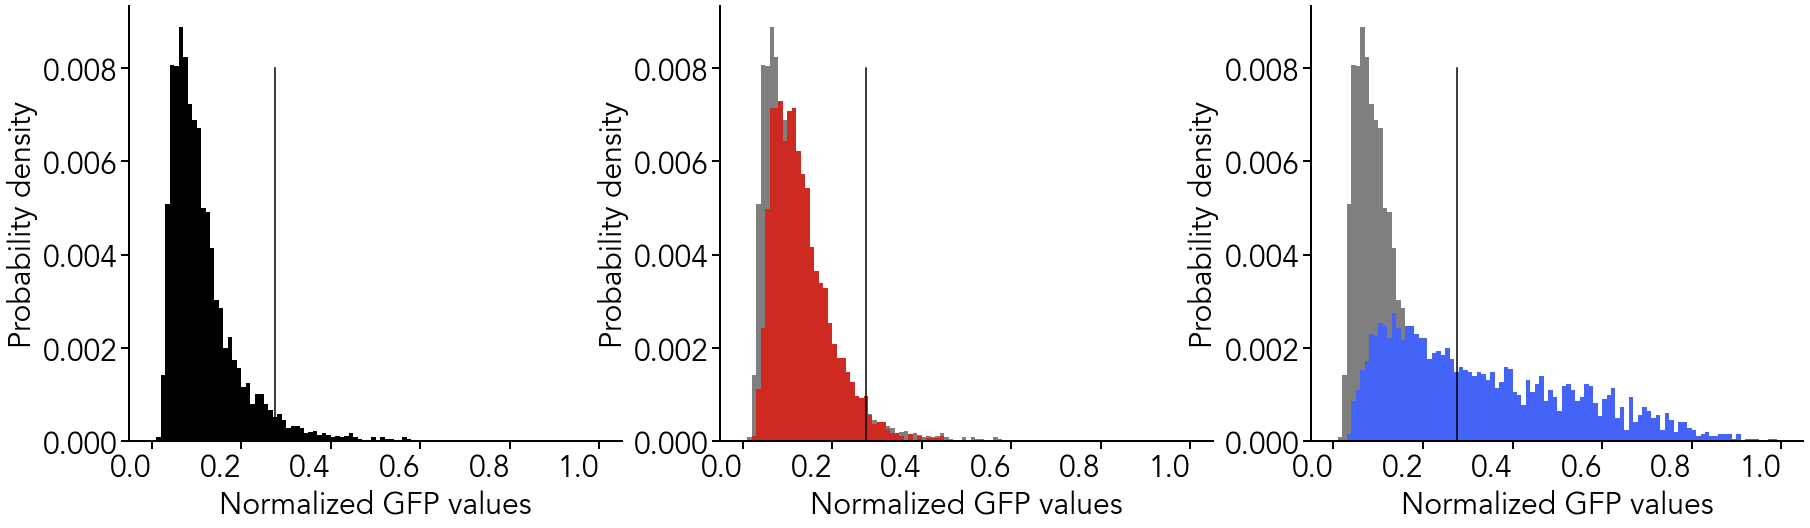

In [5]:

# collect all results
# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/m2Gs2C/"
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

wt_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002',
         ]

# in counts but not here
# 20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b
# 20210430_5dpf_m2GFP_s2mCh_uninj_i01b001
# 20210430_5dpf_m2GFP_s2mCh_uninj_i01d
# 20210430_5dpf_m2GFP_s2mCh_uninj_i02b
# 20210430_5dpf_m2GFP_s2mCh_uninj_i02d
# 20210430_5dpf_m2GFP_s2mCh_uninj_i03b
# 20210430_5dpf_m2GFP_s2mCh_uninj_i03d
# 20210430_5dpf_m2GFP_s2mCh_uninj_i04b
# 20210430_5dpf_m2GFP_s2mCh_uninj_i04d
# 20210430_5dpf_m2GFP_s2mCh_uninj_i05b
# 20210430_5dpf_m2GFP_s2mCh_uninj_i05d
# 20210514_5dpf_m2G_s2C_uninj_L28b
# 20210514_5dpf_m2G_s2C_uninj_L29b
# 20210514_5dpf_m2G_s2C_uninj_L29d
# 20210514_5dpf_m2G_s2C_uninj_L30d
# 20210514_5dpf_m2G_s2C_uninj_L31b
# 20210514_5dpf_m2G_s2C_uninj_L31d
# 20210514_5dpf_mw2G_s2C_uninj_L14b
# 20210514_5dpf_mw2G_s2C_uninj_L16b
# 20210514_5dpf_mw2G_s2C_uninj_L17b
# 20210514_5dpf_mw2G_s2C_uninj_L18b
# 20210514_5dpf_mw2G_s2C_uninj_L19b

# tbx2b
gene = 'tbx2b';
tbx2b_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004',
               ]

   
# tbx2a
gene = 'tbx2a';
tbx2a_fPaths = [
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004',
               ]


rName = 'sGtile'

wtResults = []
i=1;
for fPath in wt_fPaths:
    gene = 'wt'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
    wtResults.append(results[rName])
    i=i+1;

bResults = []
i=1;
for fPath in tbx2b_fPaths:
    gene = 'tbx2b'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
    bResults.append(results[rName])
    i=i+1;


aResults = []
i=1;
for fPath in tbx2a_fPaths:
    gene = 'tbx2a'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
    aResults.append(results[rName])
    i=i+1;


# combine across images
wtResults = np.concatenate(wtResults).ravel()
aResults = np.concatenate(aResults).ravel()
bResults = np.concatenate(bResults).ravel()

# plot histogram
pdfV = True
# wtH, wtB = np.histogram(wtResults, bins = 50, density=pdfV)
# aH, aB = np.histogram(aResults, bins = 50, density=pdfV)
# bH, bB = np.histogram(bResults, bins = 50, density=pdfV)

# plot histogram but first calculate a fixed bin number for all genotypes
# allBins = np.histogram_bin_edges(np.concatenate([wtResults,aResults,bResults]).ravel(),bins='fd');
allBins = np.arange(0,1010,10);
# allBins = np.histogram_bin_edges(np.concatenate([wtResults,bResults]).ravel(),bins='fd');
allBinsC = (allBins[:-1] + allBins[1:]) / 2 # Centers
wtH, wtB = np.histogram(wtResults, bins = allBins, density=pdfV)
aH, aB = np.histogram(aResults, bins = allBins, density=pdfV)
bH, bB = np.histogram(bResults, bins = allBins, density=pdfV)

# # this can be used for cumulative distribution then normalized
# wtH = np.cumsum(wtH)/np.max(np.cumsum(wtH));
# aH = np.cumsum(aH)/np.max(np.cumsum(aH));
# bH = np.cumsum(bH)/np.max(np.cumsum(bH));

wt95CI = np.min(allBinsC[(np.cumsum(wtH))>.095])/1000;
wGBright = np.sum(wtH[allBinsC>wt95CI*1000]);
aGBright = np.sum(aH[allBinsC>wt95CI*1000]);
bGBright = np.sum(bH[allBinsC>wt95CI*1000]);

baseColor='#000000'
fH, (axH1,axH2,axH3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
axH1.stairs(wtH,wtB/1000, fill=True, color = baseColor, alpha = 1.0)
axH2.stairs(wtH,wtB/1000, fill=True, color = baseColor, alpha = 0.5)
axH3.stairs(wtH,wtB/1000, fill=True, color = baseColor, alpha = 0.5)
axH2.stairs(aH,aB/1000, fill=True, color = zfC['lws1'], alpha = 1)
axH3.stairs(bH,bB/1000, fill=True, color = zfC['sws2'], alpha = 1)

axH1.plot([wt95CI,wt95CI],[0,0.008],color=baseColor)
axH2.plot([wt95CI,wt95CI],[0,0.008],color=baseColor)
axH3.plot([wt95CI,wt95CI],[0,0.008],color=baseColor)

formatFigureMain(fH, axH1, _)
formatFigureMain(fH, axH2, _)
formatFigureMain(fH, axH3, _)
# axH.set_title('Distribution of GFP inside L cones')
for axH in (axH1,axH2,axH3):
    axH.set_xlabel('Normalized GFP values')
    if pdfV:
        axH.set_ylabel('Probability density')
    else:
        axH.set_ylabel('Counts')
## normalized
# axH.stairs(wtH/np.max(wtH),wtB, fill=True, color = 'k', alpha = 0.5)
# axH.stairs(aH/np.max(aH),aB, fill=True, color = 'r', alpha = 0.5)
# axH.stairs(bH/np.max(bH),bB, fill=True, color = 'b', alpha = 0.5)

# dPath = '/Users/angueyraaristjm/Documents/LiLab/Manuscripts/2021_zfConeRNAseq/resources/'
dPath = '/Users/angueyraaristjm/Documents/LiLab/Presentations/revealjs/resources/20211008_UCLA/'
# plt.savefig(dPath + "CRtbx2F0_SM_hist.svg", transparent=True, format="svg")

print('# cells of bright GFP cells: wt={0}, tbx2a={1}, tbx2b={2}'.format(wGBright*1000,aGBright*1000,bGBright*1000))


### After establishing threshold based on all data, count number of cells exceeding threshold for each eye

Threshold (5%) is 0.275


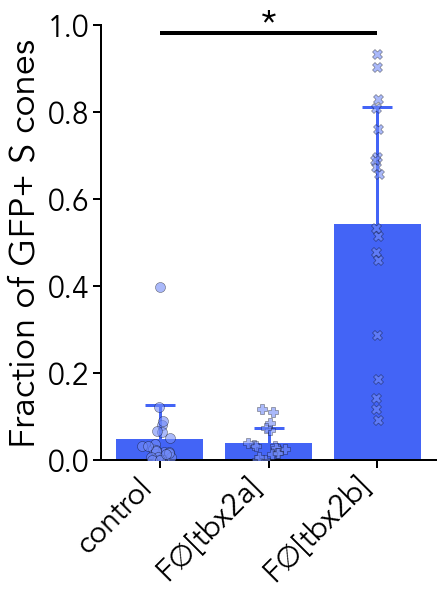

In [6]:
# collect all results
# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/m2Gs2C/"
dAnalysis = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/m2Gs2C/"

wt_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i08d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09b",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i09d",
        "20201113_5dpf_Rh2hG_s2mCh_uninj_i10d",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i11b",
        "20201113_5dpf_Rh2hG_s2mCh_uninjected_i14b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i03b",
        "20210108_5dpf_Rh2hG_s2mCh_uninjected_i04b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i06d",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_uninjected_i07b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L17_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_wt_L18_002',
         ]
    
# tbx2b
gene = 'tbx2b';
tbx2b_fPaths = [
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i04d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i05d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i06d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i07d",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08b",
        "20201113_5dpf_Rh2hG_s2mCh_CRtbx2b_i08d",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L14_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L15_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2bF0_L16_004',
               ]

   
# tbx2a
gene = 'tbx2a';
tbx2a_fPaths = [
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i01d",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02b",
        "20210108_5dpf_Rh2hG_s2mCh_CRtbx2a_i02d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i20b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21b",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i21d",
        "20210108_5dpf_Rh2hG_s2mCh_mRho647_CRtbx2a_i25b",
        "20210108_5dpf_Rh2hG_s2mCh_zpr3_647_CRtbx2a_i13b",
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L09_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L10_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L11_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L13_004',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_002',
        '20221021_5dpf_m2G_s2C_1D4mCy5_tbx2aF0_L14_004',
               ]


rName = 'sGtile'

wtResults = []
i=1;
for fPath in wt_fPaths:
    gene = 'wt'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
#     wtResults.append(np.count_nonzero(results['lGtile']>wt95CI*1000)) #this is for absolute counts
    wtResults.append(np.divide(np.count_nonzero(results['sGtile']>wt95CI*1000),len(results['sGtile']))) #this is for fraction
    i=i+1;

    
aResults = []
i=1;
for fPath in tbx2a_fPaths:
    gene = 'tbx2a'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
#     aResults.append(np.count_nonzero(results['lGtile']>wt95CI*1000)) #this is for absolute counts
    aResults.append(np.divide(np.count_nonzero(results['sGtile']>wt95CI*1000),len(results['sGtile']))) #this is for fraction
    i=i+1;

bResults = []
i=1;
for fPath in tbx2b_fPaths:
    gene = 'tbx2b'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
#     bResults.append(np.count_nonzero(results['lGtile']>wt95CI*1000)) #this is for absolute counts
    bResults.append(np.divide(np.count_nonzero(results['sGtile']>wt95CI*1000),len(results['sGtile']))) #this is for fraction
    i=i+1;

geneList = ['wt','tbx2a','tbx2b']


plotname = ''
fH, axH = plt.subplots(figsize= [6,8])

barW = np.size(geneList)+2; # bar width
barD = np.size(geneList)+1; # bar distance whitin 1 photoreceptor subtype
barP = -np.size(geneList)+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


jitter = estimateJitter(wtResults)/400
pH = plt.bar([barStep+1/barD], np.mean(wtResults), width=1/barW, color=zfC['sws2']);
pH = plt.errorbar([barStep+1/barD], np.mean(wtResults), yerr = [[0.025],[np.std(wtResults)]], ecolor=lighten_color(zfC['sws2'],1), elinewidth=3, capsize=15, capthick=3, zorder=7)
pH = plt.scatter(np.ones(len(wtResults))*[barStep+1/barD]+jitter, wtResults, color=lighten_color(zfC['sws2'],.75), zorder=8, marker = zfGm['wt'], s=100, edgecolor='#000000', linewidth=0.5, alpha = .6);
barPos = np.append(barPos,(barStep+1/barD))



jitter = estimateJitter(aResults)/400
pH = plt.bar([barStep+2/barD], np.mean(aResults), width=1/barW, color=zfC['sws2']);
pH = plt.errorbar([barStep+2/barD], np.mean(aResults), yerr = [[0.025],[np.std(aResults)]], ecolor=lighten_color(zfC['sws2'],1), elinewidth=3, capsize=15, capthick=3, zorder=7)
pH = plt.scatter(np.ones(len(aResults))*[barStep+2/barD]+jitter, aResults, color=lighten_color(zfC['sws2'],.75), zorder=8, marker = zfGm['tbx2a'], s=100, edgecolor='#000000', linewidth=0.5, alpha = .6);
barPos = np.append(barPos,(barStep+2/barD))

jitter = estimateJitter(bResults)/400
pH = plt.bar([barStep+3/barD], np.mean(bResults), width=1/barW, color=zfC['sws2']);
pH = plt.errorbar([barStep+3/barD], np.mean(bResults), yerr = [[0.025],[np.std(bResults)]], ecolor=lighten_color(zfC['sws2'],1), elinewidth=3, capsize=15, capthick=3, zorder=7)
pH = plt.scatter(np.ones(len(bResults))*[barStep+3/barD]+jitter, bResults, color=lighten_color(zfC['sws2'],.75), zorder=8, marker = zfGm['tbx2b'], s=100, edgecolor='#000000', linewidth=0.5, alpha = .6);
barPos = np.append(barPos,(barStep+3/barD))

fontProps = formatFigureMain(fH, axH, pH)

# axH.set_ylabel('GFP+ L cones per 64 x 64 $\mu$m$^2$', fontproperties=formatFigureMain(fH, axH, pH))
# axH.set_ylim([0,180]);
# stath = 170

axH.set_ylabel('Fraction of GFP+ S cones', fontproperties=fontProps)
axH.set_ylim([0,1]);
stath = 0.98

geneList = ['control','F$\emptyset$[tbx2a]','F$\emptyset$[tbx2b]']

axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(np.sort(barPos));
axH.set_xticklabels(geneList);

hH = plt.hlines(stath, barPos[0], barPos[2], colors='#000000',linewidth=4)
plt.text((barPos[0]+barPos[2])/2, stath, '*', font_properties=fontProps, fontsize=36, ha='center')# plt.savefig(savePath + "Counts_tbx2_RU.svg", transparent=True, format="svg")


dPath = '/Users/angueyraaristjm/OneDrive - National Institutes of Health/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/'
# dPath = '/Users/angueyraaristjm/Documents/LiLab/Presentations/revealjs/resources/20211008_UCLA/'
# plt.savefig(dPath + "CRtbx2F0_GFPScones.svg", transparent=True, format="svg")

print('Threshold (5%) is {0}'.format(wt95CI))

## Stats

### Kruskal-Wallis

In [12]:
geneList = ['wt','tbx2a','tbx2b']
print('wt fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(wtResults)*100,np.std(wtResults)*100))
print('tbx2a fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(aResults)*100,np.std(aResults)*100))
print('tbx2b fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(bResults)*100,np.std(bResults)*100))
# Kruskal-Wallis test for repeated testing
H, p = kruskal(wtResults, aResults,bResults)
print('H = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(H,p,len(wtResults),geneList[1],len(aResults),geneList[2],len(bResults)))
if p<0.01:
    r = scikit_posthocs.posthoc_conover([wtResults, aResults, bResults], p_adjust='Bonferroni')
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('\tConover-Iman posthoc + Bonferroni p adjustment:')
    print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(geneList[1],geneList[2],r.iloc[1,2]))
    
    r = scikit_posthocs.posthoc_dunn([wtResults, aResults, bResults], p_adjust='Bonferroni')
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('\tDunn posthoc + Bonferroni p adjustment:')
    print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}\n'.format(geneList[1],geneList[2],r.iloc[1,2]))
    

wt fractions:
	mean = 4.634%, s.d. = 7.92350%
tbx2a fractions:
	mean = 3.913%, s.d. = 3.45903%
tbx2b fractions:
	mean = 54.164%, s.d. = 26.95328%
H = 35.584, p = 0.00000001874848239113, nEyes: wt = 24; tbx2a = 18; tbx2b = 18
	Conover-Iman posthoc + Bonferroni p adjustment:
		wt vs. tbx2a: p = 1.00000000000000000000 | p = 1.0
		wt vs. tbx2b: p = 0.00000000001916598261 | p = 1.9165982609902157e-11
		tbx2a vs. tbx2b: p = 0.00000000107983128164 | p = 1.0798312816371682e-09
	Dunn posthoc + Bonferroni p adjustment:
		wt vs. tbx2a: p = 1.00000000000000000000 | p = 1.0
		wt vs. tbx2b: p = 0.00000009753363578660 | p = 9.753363578660152e-08
		tbx2a vs. tbx2b: p = 0.00000369464608315236 | p = 3.694646083152356e-06



In [ ]:
print('wt fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(wtResults)*100,np.std(wtResults)*100))
print('tbx2a fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(aResults)*100,np.std(aResults)*100))
print('tbx2b fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(bResults)*100,np.std(bResults)*100))
# Kruskal-Wallis test for repeated testing
Ah, pA = kruskal(wtResults, aResults)
print('wt vs. tbx2a:')
print('\tH = {0:.3f}, p = {1:.5f}'.format(Ah,pA))
Bh, pB = kruskal(wtResults, bResults)
print('wt vs. tbx2b:')
print('\tH = {0:.3f}, p = {1:.5f}'.format(Bh,pB))

### Mann_Whitney

In [ ]:
print('wt fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(wtResults)*100,np.std(wtResults)*100))
print('tbx2a fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(aResults)*100,np.std(aResults)*100))
print('tbx2b fractions:')
print('\tmean = {0:.3f}%, s.d. = {1:.5f}%'.format(np.mean(bResults)*100,np.std(bResults)*100))
# Mann Whitney 
Au, pA = mannwhitneyu(wtResults, aResults)
print('wt vs. tbx2a:')
print('\tU = {0:.3f}, p = {1:.5f}'.format(Au,pA))
Bu, pB = mannwhitneyu(wtResults, bResults)
print('wt vs. tbx2b:')
print('\tU = {0:.3f}, p = {1:.5f}'.format(Bu,pB))

In [ ]:
res = mannwhitneyu(wtH, bH, alternative="less", method="auto")
print(res)

## Testing Laura's buggy code

In [ ]:
def calcMillie(viewer,lname):
    outHist,outBins = np.histogram(viewer.layers[lname].data.flatten(), bins = 1000)
    return outHist,outBins

 

def GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=10):
    # clear viewer
    viewer.layers.select_all()
    viewer.layers.remove_selected()
    dOut = dAnalysis + gene + '/' + fPath + '/'
    print('Quantifying GFP in S cones of ' + fPath + '(' + gene + ')\n')
    # load mips
    viewer.open(dOut + 'M' + "_mip.tiff", plugin='builtins', colormap = 'green', blending='additive');
    viewer.open(dOut + 'S' + "_mip.tiff", plugin='builtins', colormap = 'magenta', blending='additive');
    # viewer.open(dOut + 'M' + "_seg_curated_incomplete.tiff", name='M_seg', plugin='builtins', blending='additive');
    viewer.open(dOut + 'S' + "_seg_curated.tiff", name='S_seg', plugin='builtins', blending='additive');
    # viewer.layers['M_seg'].preserve_labels = True;
    viewer.layers['S_seg'].preserve_labels = True;
    viewer.layers['S_seg'].contour = 5
    # erode L cone segmentation
    viewer.layers['S_seg'].data = ndimage.grey_erosion(viewer.layers['S_seg'].data, size=(erosionValue,erosionValue))
    # divide images into 1000 bins
    mH, mB = calcMillie(viewer,'M_mip')
    sH, sB = calcMillie(viewer,'S_mip')

 

    scones = np.unique(viewer.layers['S_seg'].data)
    scones = scones[scones>0]
    sRFP = np.empty(np.shape(scones))
    sGFP = np.empty(np.shape(scones))
    sRFPsd = np.empty(np.shape(scones))
    sGFPsd = np.empty(np.shape(scones))
    sRtile = np.empty(np.shape(scones))
    sGtile = np.empty(np.shape(scones))
    
    i=0;
    for s in scones:
        sRFP[i] = np.mean(viewer.layers['S_mip'].data[viewer.layers['S_seg'].data==s])
        sGFP[i] = np.mean(viewer.layers['M_mip'].data[viewer.layers['S_seg'].data==s])
        sRFPsd[i] = np.std(viewer.layers['S_mip'].data[viewer.layers['S_seg'].data==s])
        sGFPsd[i] = np.std(viewer.layers['M_mip'].data[viewer.layers['S_seg'].data==s])
        sRtile[i] = len(sB[sB<sRFP[i]])
        sGtile[i] = len(mB[mB<sGFP[i]])
        i=i+1;
    
    np.savez(dOut + 'quantificationGFP.npz',
             scones=scones,
             sRFP=sRFP,
             sGFP=sGFP,
             sRFPsd=sRFPsd,
             sGFPsd=sGFPsd,
             sRtile=sRtile,
             sGtile=sGtile)
    results = zip(['scones','sRFP','sGFP','sRFPsd','sGFPsd','sRtile','sGtile'],
                 [scones,sRFP,sGFP,sRFPsd,sGFPsd,sRtile,sGtile])

 

    return results

In [ ]:
erodeV = 12;

 

# analysis directory
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRfoxq2F0/mw2Gs2C/"
# dAnalysis = "C:/Users/pataklk/Documents/F0_Analysis/CRfoxq2F0/mw2Gs2C/"
# open file

 

# uninjected
### 20201009: imaged 3dpf and 5dpf larvae. Analyzing 5 dpf for paper
# gene = 'wt'
# wt_fPaths = ["20210430_5dpf_m2GFP_s2mCh_uninj_i01b001",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i01d",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i02b",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i02d",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i03b",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i03d",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i04b",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i05b",
#                 "20210430_5dpf_m2GFP_s2mCh_uninj_i05d",
#                ]
# for fPath in wt_fPaths:
#     GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=erodeV)
    
    
# # foxq2
gene = 'foxq2';
foxq2_fPaths = ["20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i01b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i01d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i02b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i02d",
                #"20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i03b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i03d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i04b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i04d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i06d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i06d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i07b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i07d",
                #"20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i08b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i08d",
               ]

 

for fPath in foxq2_fPaths:
    tempresults = GFPanalyzer(viewer,dAnalysis,gene,fPath, erosionValue=erodeV)

 


print('Finished analysis')

In [ ]:
tempresults['scones']

In [ ]:
# collect all results
# analysis directory
dAnalysis = "C:/Users/pataklk/Documents/F0_Analysis/CRfoxq2F0/mw2Gs2C/"
dAnalysis = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRfoxq2F0/mw2Gs2C/"
wt_fPaths = ["20210430_5dpf_m2GFP_s2mCh_uninj_i01b001",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i01d",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i02b",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i02d",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i03b",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i03d",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i04b",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i05b",
                "20210430_5dpf_m2GFP_s2mCh_uninj_i05d",
            ]
    
# tbx2b
gene = 'foxq2';
foxq2_fPaths = ["20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i01b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i01d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i02b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i02d",
                #"20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i03b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i03d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i04b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i04d",
#                 "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i06d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i06d",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i07b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i07d",
                #"20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i08b",
                "20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i08d",
               ]
#C:\Users\pataklk\Documents\F0_Analysis\CRfoxq2F0\mw2Gs2C\foxq2\20210430_5dpf_m2GFP_s2mCh_CRfoxq2_i01b

 

rName = 'sGtile'

 

wtResults = []
i=1;
for fPath in wt_fPaths:
    gene = 'wt'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
    wtResults.append(results[rName])
    i=i+1

 
fResults = []
i=1;
for fPath in foxq2_fPaths:
    gene = 'foxq2'
    dOut = dAnalysis + gene + '/' + fPath + '/'
    results = np.load(dOut + 'quantificationGFP.npz')
    fResults.append(results[rName])
    i=i+1

 

# combine across images
wtResults = np.concatenate(wtResults).ravel()
fResults = np.concatenate(fResults).ravel()
#bResults = np.concatenate(bResults).ravel()
print(fResults)

In [ ]:
# plot histogram
pdfV = False
# wtH, wtB = np.histogram(wtResults, bins = 50, density=pdfV)
# fH, fB = np.histogram(fResults, bins = 50, density=pdfV)


# plot histogram but first calculate a fixed bin number for all genotypes
# allBins = np.histogram_bin_edges(np.concatenate([wtResults,aResults,bResults]).ravel(),bins='fd');
allBins = np.arange(0,1010,10);
# allBins = np.histogram_bin_edges(np.concatenate([wtResults,fResults]).ravel(),bins='fd');
allBinsC = (allBins[:-1] + allBins[1:]) / 2 # Centers
wtH, wtB = np.histogram(wtResults, bins = allBins, density=pdfV)
fqH, fqB = np.histogram(fResults, bins = allBins, density=pdfV)


# # this can be used for cumulative distribution then normalized
# wtH = np.cumsum(wtH)/np.max(np.cumsum(wtH));
# aH = np.cumsum(aH)/np.max(np.cumsum(aH));
# bH = np.cumsum(bH)/np.max(np.cumsum(bH));

wt95CI = np.min(allBinsC[(np.cumsum(wtH))>.095])/1000;
wGBright = np.sum(wtH[allBinsC>wt95CI*1000]);
fGBright = np.sum(fqH[allBinsC>wt95CI*1000]);

baseColor = 'w'
if (plotStyle=='light'):
    baseColor = 'k';

fH, (axH1,axH2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
axH1.stairs(wtH,wtB/1000, fill=True, color = baseColor, alpha = 1.0)
axH2.stairs(wtH,wtB/1000, fill=True, color = baseColor, alpha = 0.8)
axH2.stairs(fqH,fqB/1000, fill=True, color = zfC['sws2'], alpha = 0.75)

axH1.plot([wt95CI,wt95CI],[0,0.014],color=baseColor)
axH2.plot([wt95CI,wt95CI],[0,0.014],color=baseColor)


formatFigureMain(fH, axH1, _)
formatFigureMain(fH, axH2, _)
# formatFigureMain(fH, axH3, _)
# # axH.set_title('Distribution of GFP inside L cones')
for axH in (axH1,axH2,axH3):
    axH.set_xlabel('Normalized GFP values')
    if pdfV:
        axH.set_ylabel('Probability density')
    else:
        axH.set_ylabel('Counts')
## normalized
# axH.stairs(wtH/np.max(wtH),wtB, fill=True, color = 'k', alpha = 0.5)
# axH.stairs(aH/np.max(aH),aB, fill=True, color = 'r', alpha = 0.5)
# axH.stairs(bH/np.max(bH),bB, fill=True, color = 'b', alpha = 0.5)

dPath = '/Users/angueyraaristjm/Documents/LiLab/Manuscripts/2021_zfConeRNAseq/resources/'
# dPath = '/Users/angueyraaristjm/Documents/LiLab/Conferences/2021_RCS/resources/'
# plt.savefig(dPath + "CRtbx2F0_SM_hist.svg", transparent=True, format="svg")

print('# cells of bright GFP cells: wt={0}, foxq2={1}'.format(wGBright*1000,fGBright*1000))

In [ ]:
# divide images into 1000 bins
mH, mB = np.histogram(viewer.layers['M_mip'].data.flatten(), bins = 1000)
sH, sB = np.histogram(viewer.layers['S_mip'].data.flatten(), bins = 1000)


fH, axH = plt.subplots(figsize=(8,8))
axH.stairs(sH,sB, fill=True, color = 'm', alpha = 0.5)
axH.stairs(mH,mB, fill=True, color = 'g', alpha = 0.5)

In [ ]:
viewer.close()

In [ ]:
viewer.close()

## Testing segmentation
1. Load single plane image from zoon in into larval eye, L cones only
2. Run cellpose
3. Count number of 

In [ ]:
viewer = napari.Viewer()

In [ ]:
# clear viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

In [ ]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/A1R/zf_partial/20201009_CRtbx2a/"
fPathL = "20201009_i06b_L"
fPathM = "20201009_i06b_M"
# load the image data and inspect its shape
zfL = imread(dPath+fPathL + ".tiff")
zfM = imread(dPath+fPathM + ".tiff")
viewer.add_image(zfL, colormap='magenta')#, contrast_limits=[196,5860]);
viewer.add_image(zfM, colormap='green', blending='additive')#, contrast_limits=[223,6721]);
viewer.open(dPath+fPathL + "_seg.tiff", name='zfL_seg', plugin='builtins');
viewer.open(dPath+fPathM + "_seg.tiff", name='zfM_seg', plugin='builtins');
# nbscreenshot(viewer)

In [ ]:
nL = len(np.unique(viewer.layers['zfL_seg'].data))-1
print("Image has {0} L cones".format(nL))
nM = len(np.unique(viewer.layers['zfM_seg'].data))-1
print("Image has {0} M cones".format(nM))

dL = viewer.layers['zfL_seg'].data
dM = viewer.layers['zfM_seg'].data

Not sure how to normalize across images...
1. average GFP instensity inside M-cones? &rarr; difficult in CRISPants
1. max GFP intensity? &rarr; could be ok

In [ ]:
# eroding segmentation because it too generous with ROIs and I want to exclude GFP diffraction
viewer.layers['zfL_seg'].data = ndimage.grey_erosion(dL, size=(8,8))
viewer.layers['zfM_seg'].data = ndimage.grey_erosion(dM, size=(8,8))

L_avgG = np.zeros([nL,1])
L_avgR = np.zeros([nL,1])
# calculate mean GFP intensity inside each L cone (normalized and baseline subtracted)
maxM = viewer.layers['zfM'].data[viewer.layers['zfL_seg'].data == 0].max()
maxL = viewer.layers['zfL'].data[viewer.layers['zfL_seg'].data == 1].max()
minM = viewer.layers['zfM'].data[viewer.layers['zfL_seg'].data == 0].min()
minL = viewer.layers['zfL'].data[viewer.layers['zfL_seg'].data == 0].min()
for roi in range(nL):
    tempROI = viewer.layers['zfL_seg'].data == roi
    L_avgG[roi] = (viewer.layers['zfM'].data[tempROI].mean()-minM)/(maxM-minM)
    L_avgR[roi] = (viewer.layers['zfL'].data[tempROI].mean()-minL)/(maxL-minL)

M_avgG = np.zeros([nM,1])
M_avgR = np.zeros([nM,1])
# calculate mean GFP intensity inside each M cone (normalized and baseline subtracted)
for roi in range(nM):
    tempROI = viewer.layers['zfM_seg'].data == roi
    M_avgG[roi] = (viewer.layers['zfM'].data[tempROI].mean()-minM)/(maxM-minM)
    M_avgR[roi] = (viewer.layers['zfL'].data[tempROI].mean()-minL)/(maxL-minL)

    
nbins = 20
denseFlag = True
    
plt.figure(figsize=(8,6))
plt.hist(L_avgG, bins=np.divide(range(0,nbins+1),nbins), density = denseFlag, color = (1.0,0.5,0.0,0.5), label="L_GFP")
plt.hist(L_avgR, bins=np.divide(range(0,nbins+1),nbins), density = denseFlag, color = (1.0,0.0,0.0,0.5), label="L_tdT")

plt.hist(M_avgG, bins=np.divide(range(0,nbins+1),nbins), density = denseFlag, color = (0.0,1.0,0.0,0.5), label="M_GFP")
plt.hist(M_avgR, bins=np.divide(range(0,nbins+1),nbins), density = denseFlag, color = (0.5,1.0,0.0,0.5), label="M_tdT")

plt.xlabel("Normalized intensity", size=14)
plt.ylabel("Probability", size=14)
plt.title("")
plt.legend(loc='upper right')
# plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

In [ ]:
# viewer.layers['zfM_seg'].data = dM
viewer.layers['zfL_seg'].data = ndimage.grey_erosion(viewer.layers['zfL_seg'].data, size=(10,10))

In [ ]:
@viewer.bind_key('k')
def toggle_sel(viewer):
    if (viewer.layers['zfM_seg'].show_selected_label == True):
        viewer.layers['zfM_seg'].show_selected_label = False
    elif (viewer.layers['zfM_seg'].show_selected_label == False):
        viewer.layers['zfM_seg'].show_selected_label = True

In [ ]:
viewer.layers['zfM_seg'].show_selected_label=False

In [ ]:
viewer.layers['zfM_seg'].data